# Heart Disease Data Analysis Project

Group Members:

Beyzagül Demir 28313

Görkem Filizöz 27814

Furkan Kerim Yıldırım 28138

Minel Sena Sakarya 27755

## Introduction

Today, one of the most important causes of death for people is heart disease. Many
people suffer from heart disease, which can have fatal consequences. Predicting heart
diseases is very important for prolonging human lifespan. For this reason, with the help
of a large data set, our aim is examine and predict the effect of some factors such as age,
gender, genetic predisposition, place of birth on heart diseases.

### Problem Definition
---

In order to predict heart disease we need to calculate the risk of heart disease for every factor. Our aim is determine correlations (if any) between risk factors such as age, sex, rate of chest pain, resting blood pressure, and number of major vessels. Using information we got from dataset our main aim in this project is developping a prediction model.

Steps:

First  visualization of our risk factors in our dataset.

Then analysis relationship between them and heart disease occurance (target = 1).

Using analyses educate the maching learning algorithm.

### Utilized Datasets
---

In our project we are using one dataset.

In this report we used "Heart Disease Dataset" which includes 
age, sex, chest pain type (4 values), resting blood pressure, serum cholestoral in mg/dl, fasting blood sugar > 120 mg/dl, resting electrocardiographic results (values 0,1,2), maximum heart rate achieved, exercise induced angina, oldpeak = ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by flourosopy,thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (thalassemia disease rate).
        

Link for dataset1:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 

In [3]:
#importing necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special
import seaborn as sns
from os.path import join
from os import listdir
from statsmodels.stats.weightstats import ztest as ztest


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
#importing dataframe
#https://drive.google.com/file/d/18jYywWgN0nRoEGzsGzu_01tvEdIivbBk/view?usp=sharing
filename = "heart.csv"
path_prefix = "./"
df = pd.read_csv(join(path_prefix, filename))

In [ ]:
#show some basic informations about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#show dataset's edges (number of rows and columns)
df.shape

(1025, 14)

In [ ]:
#show the types and names of the columns of dataset
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Exploratory Data Analysis


We are analysing our dataset under this titles:


- Visualizations of Aggregated Forms Based on Features
- Analysis of the Most Common Chest Pain Rates
- How Risk of Different Diseases Change by Age

```



In [ ]:
#show first 5 row of df
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Visualizations of Aggregated Forms Based on Features
---

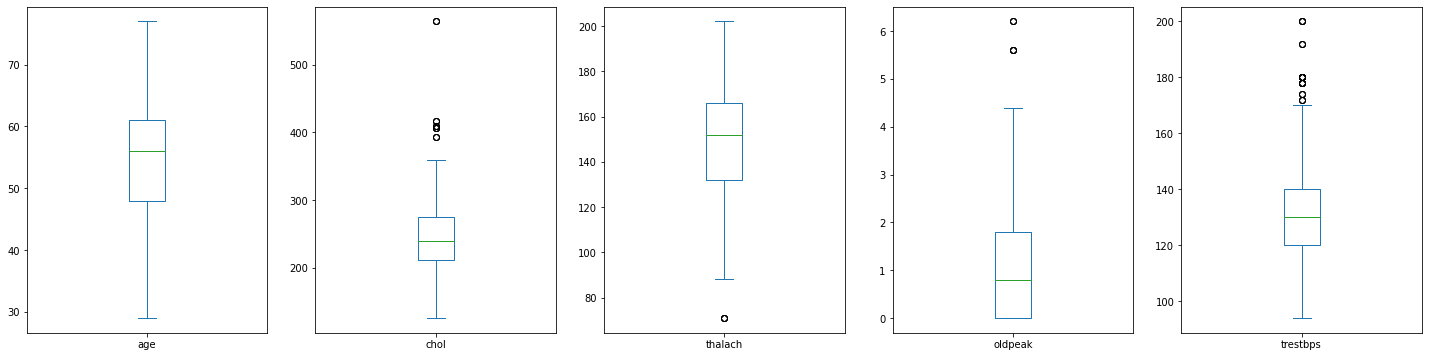

In [ ]:
# distribution plots
fig, ax = plt.subplots(1, 5, figsize=(25,6))

#create boxplots for appropriate columns
df["age"].plot(kind="box", ax=ax[0])
df["chol"].plot(kind="box", ax=ax[1])
df["thalach"].plot(kind="box", ax=ax[2])
df["oldpeak"].plot(kind="box", ax=ax[3])
df["trestbps"].plot(kind="box", ax=ax[4])

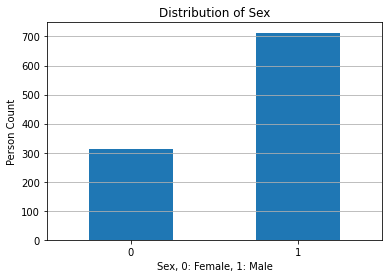

In [ ]:
#Plot sex distribution as bar chart
ax = df["sex"].value_counts()[[0,1]].plot(kind="bar", rot=0)
ax.set_xlabel('Sex, 0: Female, 1: Male')
ax.set_ylabel('Person Count')
ax.set_title('Distribution of Sex')
ax.grid(axis='y');

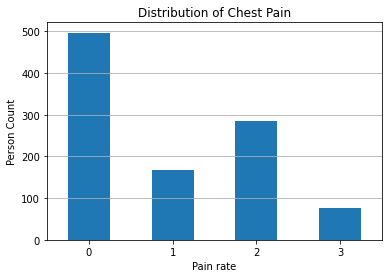

In [ ]:
#Plot Chest Pain Rate distribution as bar chart
cp = df["cp"].value_counts()[[0,1, 2, 3]].plot(kind="bar", rot=0)
cp.set_xlabel('Pain rate')
cp.set_ylabel('Person Count')
cp.set_title('Distribution of Chest Pain')
cp.grid(axis='y');

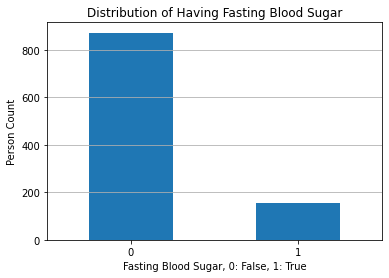

In [ ]:
#Plot Having Fasting Blood Sugar distribution as bar chart
fbs = df["fbs"].value_counts()[[0,1]].plot(kind="bar", rot=0)
fbs.set_xlabel('Fasting Blood Sugar, 0: False, 1: True')
fbs.set_ylabel('Person Count')
fbs.set_title('Distribution of Having Fasting Blood Sugar')
fbs.grid(axis='y');

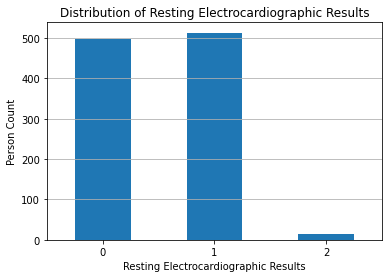

In [ ]:
#Plot Resting Electrocardiographic Results distribution as bar chart
restecg = df["restecg"].value_counts()[[0,1,2]].plot(kind="bar", rot=0)
restecg.set_xlabel('Resting Electrocardiographic Results')
restecg.set_ylabel('Person Count')
restecg.set_title('Distribution of Resting Electrocardiographic Results')
restecg.grid(axis='y');

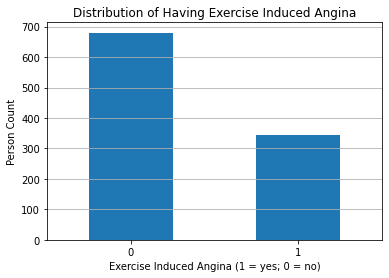

In [ ]:
#Plot Exercise Induced Angina distribution as bar chart
exang = df["exang"].value_counts()[[0,1]].plot(kind="bar", rot=0)
exang.set_xlabel('Exercise Induced Angina (1 = yes; 0 = no)')
exang.set_ylabel('Person Count')
exang.set_title('Distribution of Having Exercise Induced Angina')
exang.grid(axis='y');

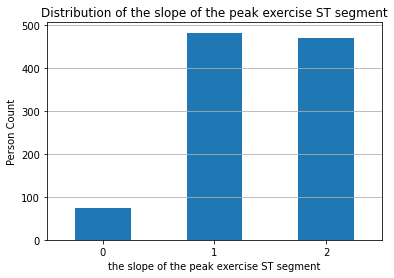

In [ ]:
#Plot slope of the peak exercise ST distribution as bar chart
slope = df["slope"].value_counts()[[0,1,2]].plot(kind="bar", rot=0)
slope.set_xlabel('the slope of the peak exercise ST segment')
slope.set_ylabel('Person Count')
slope.set_title('Distribution of the slope of the peak exercise ST segment')
slope.grid(axis='y');

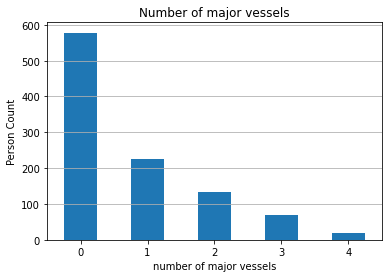

In [ ]:
#Plot number of major vessels distribution as bar chart
ca = df["ca"].value_counts()[[0,1,2,3,4]].plot(kind="bar", rot=0)
ca.set_xlabel('number of major vessels')
ca.set_ylabel('Person Count')
ca.set_title('Number of major vessels')
ca.grid(axis='y');

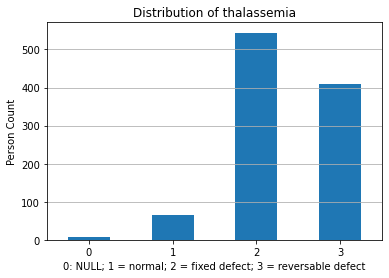

In [ ]:
#Plot distribution of thalassemia as bar chart
thal = df["thal"].value_counts()[[0,1,2,3]].plot(kind="bar", rot=0)
thal.set_xlabel('0: NULL; 1 = normal; 2 = fixed defect; 3 = reversable defect')
thal.set_ylabel('Person Count')
thal.set_title('Distribution of thalassemia')
thal.grid(axis='y');

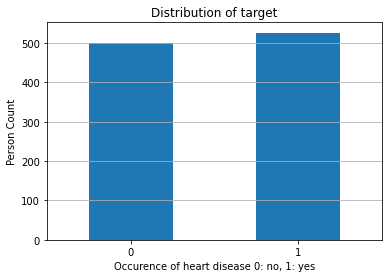

In [ ]:
#Plot Distribution of target (heart disease yes or no) as bar chart
target = df["target"].value_counts()[[0,1]].plot(kind="bar", rot=0)
target.set_xlabel('Occurence of heart disease 0: no, 1: yes')
target.set_ylabel('Person Count')
target.set_title('Distribution of target')
target.grid(axis='y');

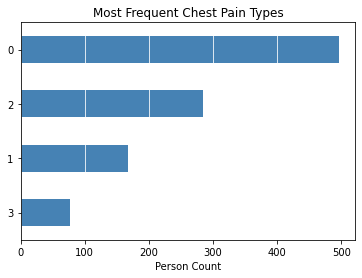

In [ ]:
#Separate data according to chest pain rate of people, then plot the distribution
ax = df["cp"].value_counts(ascending=True)[-5:].plot(kind="barh", color="steelblue")
ax.set_xlabel('Person Count')
ax.set_title('Most Frequent Chest Pain Types')
ax.grid(axis='x', color='white');

### How Risk of Different Diseases Change by Age
---

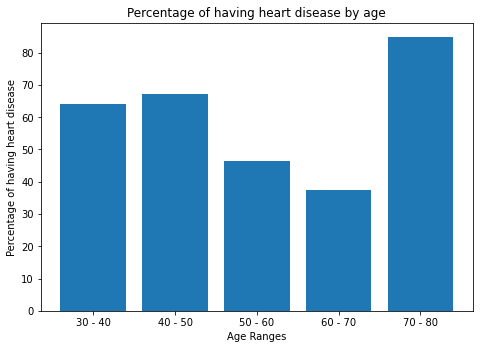

In [ ]:
#create a list of age and target
myvalues = df[["age", "target"]].values
mylist = list(map(tuple, myvalues))

#classify people according to their their age (10 each).
age_list = [[person for person in mylist if 30 < person[0] <= 40],
            [person for person in mylist if 40 < person[0] <= 50],
            [person for person in mylist if 50 < person[0] <= 60],
            [person for person in mylist if 60 < person[0] <= 70],
            [person for person in mylist if 70 < person[0] <= 80]]

#clasify people according to their target value
target_age_list = [[person for person in age_list[i] if person[1] == 1] for i in range(len(age_list))]

#create a list that returns the ratio of target value of heart diesase
person_percentage = [100*len(target_age_list[i]) / len(age_list[i]) for i in range(5)]
age_range = ['30 - 40','40 - 50', '50 - 60', '60 - 70', '70 - 80']

#show data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Percentage of having heart disease by age')
ax.set_xlabel('Age Ranges')
ax.set_ylabel('Percentage of having heart disease')
ax.bar(age_range, person_percentage)
plt.show()

### How to Age Effects Maximum Heart Rate
---

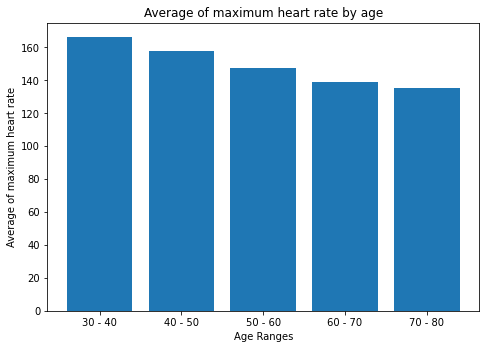

In [ ]:
myList = [(i[0], i[1]) for i in df[["thalach","age"]].values]

age_list = [[person for person in myList if 30 < person[1] <= 40],
            [person for person in myList if 40 < person[1] <= 50],
            [person for person in myList if 50 < person[1] <= 60],
            [person for person in myList if 60 < person[1] <= 70],
            [person for person in myList if 70 < person[1] <= 80]]


thalach_avg = [sum(person[0] for person in persons)/len(persons) for persons in age_list]
age_range = ['30 - 40','40 - 50', '50 - 60', '60 - 70', '70 - 80']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Average of maximum heart rate by age')
ax.set_xlabel('Age Ranges')
ax.set_ylabel('Average of maximum heart rate')
ax.bar(age_range, thalach_avg)
plt.show()

### How to Age Effects Tresting Blood Pressure
---

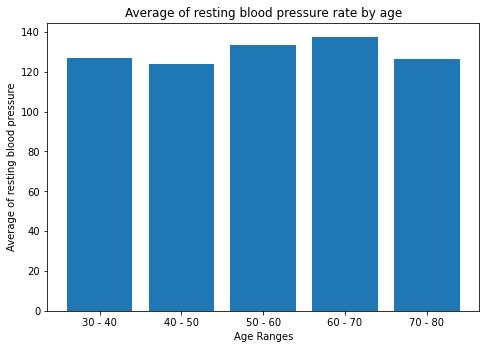

In [ ]:
myList = [(i[0], i[1]) for i in df[["trestbps","age"]].values]

age_list = [[person for person in myList if 30 < person[1] <= 40],
            [person for person in myList if 40 < person[1] <= 50],
            [person for person in myList if 50 < person[1] <= 60],
            [person for person in myList if 60 < person[1] <= 70],
            [person for person in myList if 70 < person[1] <= 80]]


trestbps_avg = [sum(person[0] for person in persons)/len(persons) for persons in age_list]
age_range = ['30 - 40','40 - 50', '50 - 60', '60 - 70', '70 - 80']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Average of resting blood pressure rate by age')
ax.set_xlabel('Age Ranges')
ax.set_ylabel('Average of resting blood pressure')
ax.bar(age_range, trestbps_avg)
plt.show()

### Distrubution of Chest Types According to Age
---

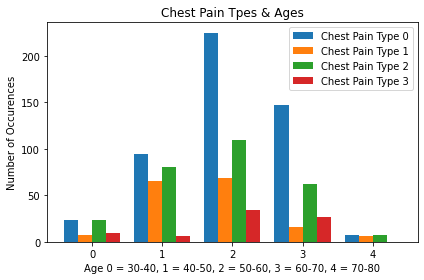

In [ ]:
myList = [(i[0], i[1]) for i in df[["cp","age"]].values]

age_list = [[person for person in myList if 30 < person[1] <= 40],
            [person for person in myList if 40 < person[1] <= 50],
            [person for person in myList if 50 < person[1] <= 60],
            [person for person in myList if 60 < person[1] <= 70],
            [person for person in myList if 70 < person[1] <= 80]]

cp0 = [len([person for person in age_list[i] if person[0] == 0]) for i in range(5)]
cp1 = [len([person for person in age_list[i] if person[0] == 1]) for i in range(5)]
cp2 = [len([person for person in age_list[i] if person[0] == 2]) for i in range(5)]
cp3 = [len([person for person in age_list[i] if person[0] == 3]) for i in range(5)]
age_range = ['30-40', '40-50', '50-60', '60-70', '70-80']

x = np.arange(len(age_range))
width = 0.20
  
fig, ax = plt.subplots() 

# plot data in grouped manner of bar type
rect0 = plt.bar(x-0.3, cp0, width, label='Chest Pain Type 0')
rect1 = plt.bar(x-0.1, cp1, width, label='Chest Pain Type 1')
rect2 = plt.bar(x+0.1, cp2, width, label='Chest Pain Type 2')
rect3 = plt.bar(x+0.3, cp3, width, label='Chest Pain Type 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Occurences')
ax.set_xlabel('Age 0 = 30-40, 1 = 40-50, 2 = 50-60, 3 = 60-70, 4 = 70-80')
ax.set_title('Chest Pain Tpes & Ages')
ax.set_xticks(x, age_range)
ax.legend()

fig.tight_layout()

plt.show()

### How to Chest Pain Effects Maximum Heart Rate
---

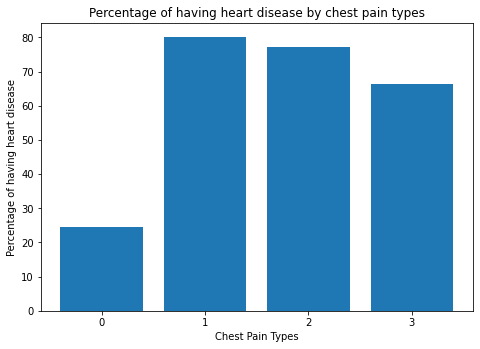

In [ ]:
myList = [(i[0], i[1]) for i in df[["target","cp"]].values]

cp_list = [[person for person in myList if person[1] == 0],
           [person for person in myList if person[1] == 1],
           [person for person in myList if person[1] == 2],
           [person for person in myList if person[1] == 3]]

target_age_list = [[person for person in cp_list[i] if person[0] == 1] for i in range(len(cp_list))]

person_percentage = [100*len(target_age_list[i]) / len(cp_list[i]) for i in range(4)]
cp_range = ['0', '1', '2', '3']


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Percentage of having heart disease by chest pain types')
ax.set_xlabel('Chest Pain Types')
ax.set_ylabel('Percentage of having heart disease')
ax.bar(cp_range, person_percentage)
plt.show()

### How to Chest Pain Types Effects Resting Blood Pressure
---

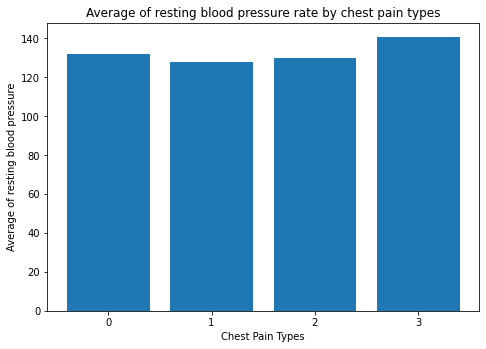

In [ ]:
myList = [(i[0], i[1]) for i in df[["trestbps","cp"]].values]

cp_list = [[person for person in myList if person[1] == 0],
           [person for person in myList if person[1] == 1],
           [person for person in myList if person[1] == 2],
           [person for person in myList if person[1] == 3]]

trestbps_avg = [sum(person[0] for person in persons)/len(persons) for persons in cp_list]
cp_range = ['0', '1', '2', '3']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Average of resting blood pressure rate by chest pain types')
ax.set_xlabel('Chest Pain Types')
ax.set_ylabel('Average of resting blood pressure')
ax.bar(cp_range, trestbps_avg)
plt.show()

### Changing Resting Blood Pressure by Maximum Heart Rate
---

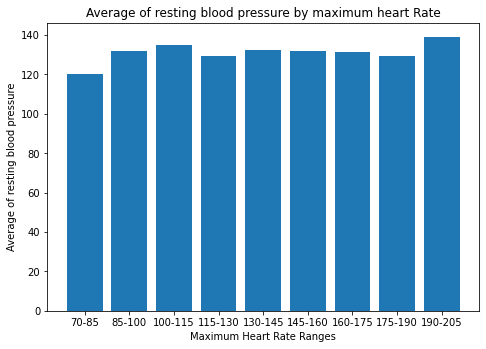

In [ ]:
myList = [(i[0], i[1]) for i in df[["trestbps","thalach"]].values]

thalach_list = [[person for person in myList if 70 < person[1] <= 85],
                [person for person in myList if 85 < person[1] <= 100],
                [person for person in myList if 100 < person[1] <= 115],
                [person for person in myList if 115 < person[1] <= 130],
                [person for person in myList if 130 < person[1] <= 145],
                [person for person in myList if 145 < person[1] <= 160],
                [person for person in myList if 160 < person[1] <= 175],
                [person for person in myList if 175 < person[1] <= 190],
                [person for person in myList if 190 < person[1] <= 205]]

trestbps_avg = [sum(person[0] for person in persons)/len(persons) for persons in thalach_list]
thalach_range = ['70-85', '85-100', '100-115', '115-130', '130-145', '145-160', '160-175', '175-190', '190-205']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Average of resting blood pressure by maximum heart Rate')
ax.set_xlabel('Maximum Heart Rate Ranges')
ax.set_ylabel('Average of resting blood pressure')
ax.bar(thalach_range, trestbps_avg)
plt.show()

### How Risk of Different Diseases Change by cholesterol
---

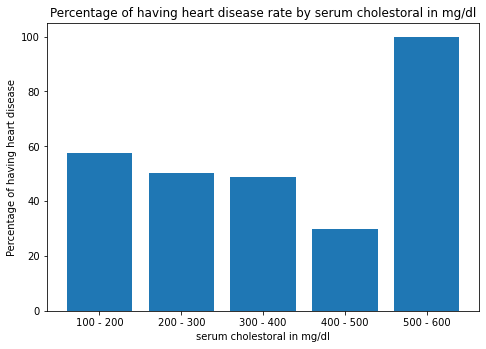

In [ ]:
myList = [(i[0], i[1]) for i in df[["target","chol"]].values]

chol_list = [[person for person in myList if 100 < person[1] <= 200],
            [person for person in myList if 200 < person[1] <= 300],
            [person for person in myList if 300 < person[1] <= 400],
            [person for person in myList if 400 < person[1] <= 500],
            [person for person in myList if 500 < person[1] <= 600]]

target_list = [[person for person in chol_list[i] if person[0] == 1] for i in range(len(chol_list))]
person_percentage = [100*len(target_list[i]) / len(chol_list[i]) for i in range(5)]

chol_range = ['100 - 200','200 - 300', '300 - 400', '400 - 500', '500 - 600']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Percentage of having heart disease rate by serum cholestoral in mg/dl')
ax.set_xlabel('serum cholestoral in mg/dl')
ax.set_ylabel('Percentage of having heart disease')
ax.bar(chol_range, person_percentage)
plt.show()

### How Risk of Different Diseases Change by Maximum Heart Rate
---

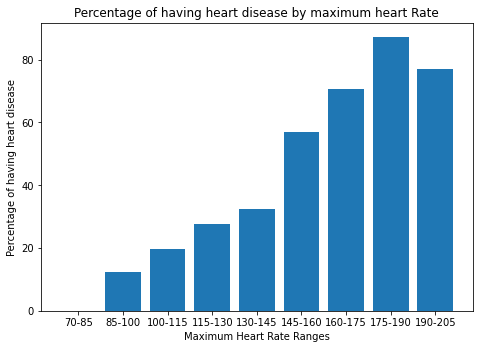

In [ ]:
myList = [(i[0], i[1]) for i in df[["target","thalach"]].values]

thalach_list = [[person for person in myList if 70 < person[1] <= 85],
                [person for person in myList if 85 < person[1] <= 100],
                [person for person in myList if 100 < person[1] <= 115],
                [person for person in myList if 115 < person[1] <= 130],
                [person for person in myList if 130 < person[1] <= 145],
                [person for person in myList if 145 < person[1] <= 160],
                [person for person in myList if 160 < person[1] <= 175],
                [person for person in myList if 175 < person[1] <= 190],
                [person for person in myList if 190 < person[1] <= 205]]

target_age_list = [[person for person in thalach_list[i] if person[0] == 1] for i in range(len(thalach_list))]

person_percentage = [100*len(target_age_list[i]) / len(thalach_list[i]) for i in range(9)]
thalach_range = ['70-85', '85-100', '100-115', '115-130', '130-145', '145-160', '160-175', '175-190', '190-205']


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Percentage of having heart disease by maximum heart Rate')
ax.set_xlabel('Maximum Heart Rate Ranges')
ax.set_ylabel('Percentage of having heart disease')
ax.bar(thalach_range, person_percentage)
plt.show()

### Relationship between cholesterol and blood pressure
---

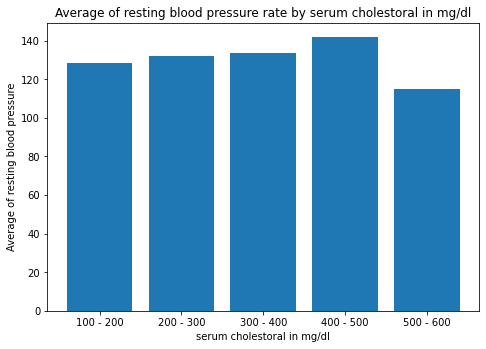

In [ ]:
myList = [(i[0], i[1]) for i in df[["trestbps","chol"]].values]

chol_list = [[person for person in myList if 100 < person[1] <= 200],
            [person for person in myList if 200 < person[1] <= 300],
            [person for person in myList if 300 < person[1] <= 400],
            [person for person in myList if 400 < person[1] <= 500],
            [person for person in myList if 500 < person[1] <= 600]]


trestbps_avg = [sum(person[0] for person in persons)/len(persons) for persons in chol_list]
chol_range = ['100 - 200','200 - 300', '300 - 400', '400 - 500', '500 - 600']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Average of resting blood pressure rate by serum cholestoral in mg/dl')
ax.set_xlabel('serum cholestoral in mg/dl')
ax.set_ylabel('Average of resting blood pressure')
ax.bar(chol_range, trestbps_avg)
plt.show()

## Hypothesis Testing

We will work on more extensive data to construct better prediction model.
After revising all information, we will implement machine learning methods and educate our algorithm.

### Statistical Testing of Resting Bps
---

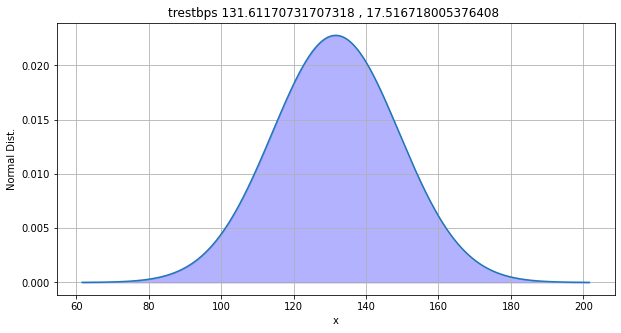

In [ ]:
# mean variance etc
n = df.size
mean = df["trestbps"].mean()
#chol_mean = df["chol"].mean()
std = df["trestbps"].std()
#chol_std = df["chol"].std()
offset = std*4

x = np.linspace(mean - offset, mean + offset, n)
y = stats.norm.pdf(x, mean, std)
plt.figure(figsize = (10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Dist.")
plt.fill_between(x,y, alpha = 0.3, color = "b")
plt.title(f"trestbps {mean} , {std} ")
plt.show()


In [ ]:
test_type = "trestbps"

have_disease = df[df["target"] == 1][test_type]  # completed students
no_disease = df[df["target"] == 0][test_type]       # none students

In [ ]:
print(f"mean of trestbps of people having disease: {have_disease.mean():.2f}")
print(f"std of trestbps of people having disease: {have_disease.std():.2f}")

mean of trestbps of people having disease: 129.25
std of trestbps of people having disease: 16.11


In [ ]:
print(f"mean of trestbps of people not having disease: {no_disease.mean():.2f}")
print(f"std of trestbps of people not having disease: {no_disease.std():.2f}")

mean of trestbps of people not having disease: 134.11
std of trestbps of people not having disease: 18.58


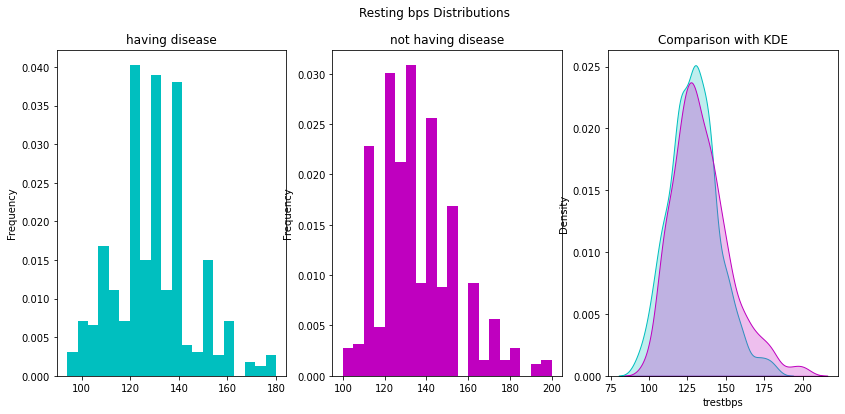

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
have_disease.plot(kind="hist", ax=ax[0], bins=20, label="have_disease", color="c", density=True)
ax[0].set_title("having disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="no_disease", color="m", density=True)
ax[1].set_title("not having disease")

sns.kdeplot(have_disease, shade=True, label="have_disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="no_disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Resting bps Distributions")
plt.show()

In [ ]:
ztest(no_disease, have_disease, value=0)

(4.481891658165884, 7.398430300279689e-06)

The first value above represents statistic and the second one represents p-value of z test. Since P-value is less than our level of significance (0.05) we are rejecting the null hypothesis (mean of target 1 - mean of target 2 = 0) and we can conclude that resting bps(trestbp) is related to heart disease risk. People who have heart disease are less resting bps value than peeople who do not have heart disease.

### Statistical Testing of Chest Paint Types
---

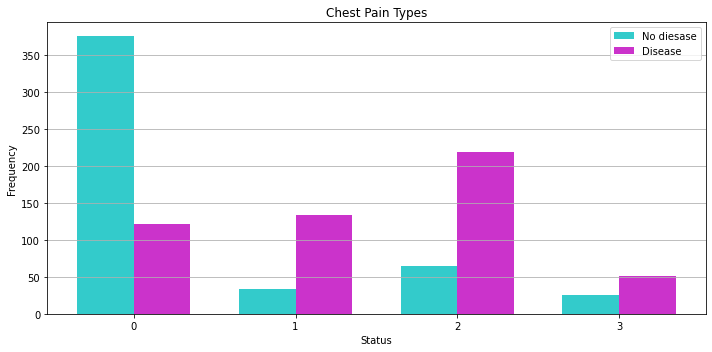

In [ ]:
#Since chest pain types are categorical data we used chi^2 test in this section
crosstab_df = pd.crosstab(df["target"], df["cp"])

disease = crosstab_df.loc[1]
no_disease = crosstab_df.loc[0]

fig, ax = plt.subplots(1, 1, figsize=(10,5))

index = np.arange(crosstab_df.columns.shape[0])
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, crosstab_df.loc[0], bar_width,
    alpha=opacity,
    color='c',
    label='No diesase')
 
rects2 = plt.bar(index + bar_width, crosstab_df.loc[1], bar_width,
    alpha=opacity,
    color='m',
    label='Disease')
 
plt.ylabel("Frequency")
plt.title("Chest Pain Types")
plt.grid(axis="y")
plt.xlabel('Status')
plt.xticks(index + (bar_width / 2), crosstab_df.columns)
plt.legend()
 
plt.tight_layout()
plt.show()


In [ ]:
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)

result = "independet" if p_value > alpha else "dependent"
print(f"Target and chest pain type status are {result} .")

Target and chest pain type status are dependent .


According to dataset, chest pain types and having heart disease are dependent.

### Statistical Testing for Cholesterol
---

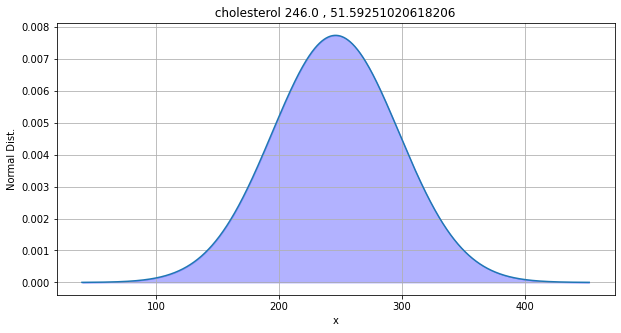

In [ ]:
# mean variance etc
n = df.size

chol_mean = df["chol"].mean()

chol_std = df["chol"].std()
offset = chol_std*4

x = np.linspace(chol_mean - offset, chol_mean + offset, n)
y = stats.norm.pdf(x, chol_mean, chol_std)
plt.figure(figsize = (10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Dist.")
plt.fill_between(x,y, alpha = 0.3, color = "b")
plt.title(f" cholesterol {chol_mean} , {chol_std} ")
plt.show()


In [ ]:
test_type = "chol"

have_disease = df[df["target"] == 1][test_type]  # having heart disease
no_disease = df[df["target"] == 0][test_type]       # not have heart disease


In [ ]:
print(f"mean of chol of people having disease: {have_disease.mean():.2f}")
print(f"std of chol of people having disease: {have_disease.std():.2f}")

mean of chol of people having disease: 240.98
std of chol of people having disease: 53.01


In [ ]:
print(f"mean of chol of people not having disease: {no_disease.mean():.2f}")
print(f"std of chol of people not having disease: {no_disease.std():.2f}")

mean of chol of people not having disease: 251.29
std of chol of people not having disease: 49.56


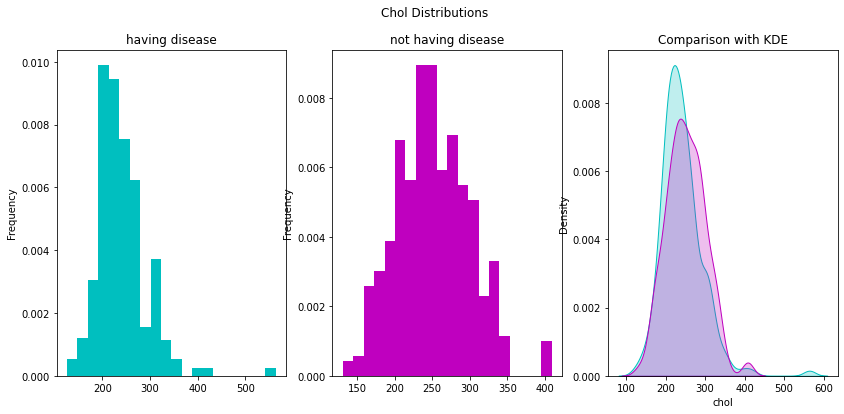

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
have_disease.plot(kind="hist", ax=ax[0], bins=20, label="have_disease", color="c", density=True)
ax[0].set_title("having disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="no_disease", color="m", density=True)
ax[1].set_title("not having disease")

sns.kdeplot(have_disease, shade=True, label="have_disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="no_disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Chol Distributions")
plt.show()

In [ ]:
ztest(no_disease, have_disease, value=0)

(3.213433097179175, 0.0013115835020684594)

The first value above represents statistic and the second one represents p-value of z test. Since P-value is less than our level of significance (0.05) we are rejecting the null hypothesis (mean of target 1 - mean of target 2 = 0) and we can conclude that cholesterol (chol) is related to heart disease risk. People who have heart disease have less cholesterol level than people who do not have heart disese.

### Statistical Testing for Ages
---

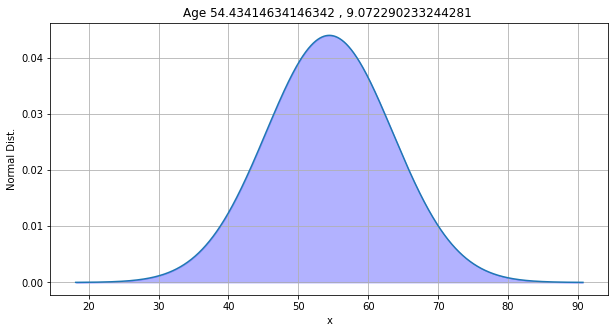

In [ ]:
# mean variance etc
n = df.size

age_mean = df["age"].mean()

age_std = df["age"].std()
offset = age_std*4

x = np.linspace(age_mean - offset, age_mean + offset, n)
y = stats.norm.pdf(x, age_mean, age_std)
plt.figure(figsize = (10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Dist.")
plt.fill_between(x,y, alpha = 0.3, color = "b")
plt.title(f"Age {age_mean} , {age_std} ")
plt.show()


In [ ]:
test_type = "age"

have_disease = df[df["target"] == 1][test_type]  # having heart disease
no_disease = df[df["target"] == 0][test_type]       # not have heart disease

In [ ]:
print(f"mean of age of people having disease: {have_disease.mean():.2f}")
print(f"std of age of people having disease: {have_disease.std():.2f}")

mean of age of people having disease: 52.41
std of age of people having disease: 9.63


In [ ]:
print(f"mean of age of people not having disease: {no_disease.mean():.2f}")
print(f"std of age of people not having disease: {no_disease.std():.2f}")

mean of age of people not having disease: 56.57
std of age of people not having disease: 7.91


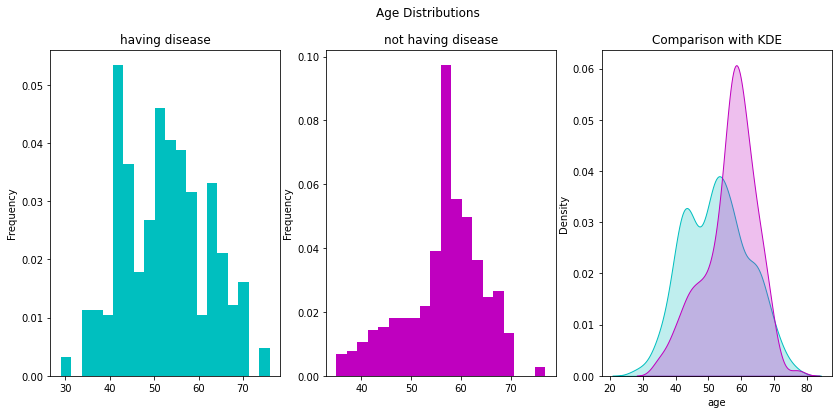

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
have_disease.plot(kind="hist", ax=ax[0], bins=20, label="have_disease", color="c", density=True)
ax[0].set_title("having disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="no_disease", color="m", density=True)
ax[1].set_title("not having disease")

sns.kdeplot(have_disease, shade=True, label="have_disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="no_disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Age Distributions")
plt.show()

In [ ]:
ztest(no_disease, have_disease, value=0)

(7.535591207962243, 4.8612726394366917e-14)

The first value above represents statistic and the second one represents p-value of z test. Since P-value is less than our level of significance (0.05) we are rejecting the null hypothesis (mean of target 1 - mean of target 2 = 0) and we can conclude that age is related to heart disease risk. People who have heart disease are generally younger than people who do not have heart disease.

### Statistical Testing of Gender
---

In [ ]:
crosstab_df = df.groupby(['target', 'sex']).size().unstack()
crosstab_df.rename(columns = {0:'Female', 1:'Male'}, inplace = True)

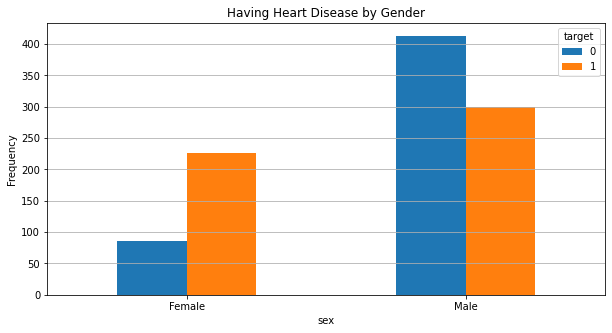

In [ ]:
ax = crosstab_df.T.plot.bar(figsize=(10, 5), rot=0)
ax.set_ylabel("Frequency")
ax.set_title("Having Heart Disease by Gender")
ax.grid(axis="y");

In [ ]:
alpha = 0.05
chi2_test_stat, p_value, dof, expected_freqs = stats.chi2_contingency(crosstab_df)

result = "independet" if p_value > alpha else "dependent"
print(f"Gender and having heart disease status are {result} .")

Gender and having heart disease status are dependent


According to dataset, genders and having heart disease are dependent.

### Statistical Testing of Age for Female People
---

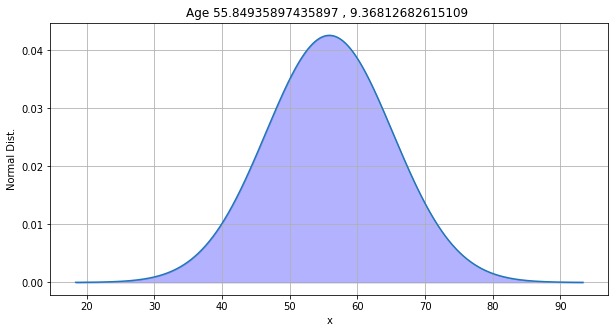

In [ ]:
# mean variance etc
n = df[df["sex"] == 0].size

age_mean = df[df["sex"] == 0]["age"].mean()

age_std = df[df["sex"] == 0]["age"].std()
offset = age_std*4

x = np.linspace(age_mean - offset, age_mean + offset, n)
y = stats.norm.pdf(x, age_mean, age_std)
plt.figure(figsize = (10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Dist.")
plt.fill_between(x,y, alpha = 0.3, color = "b")
plt.title(f"Age {age_mean} , {age_std} ")
plt.show()


In [ ]:
test_type = "age"

have_disease = df[df["target"] == 1][df["sex"] == 0][test_type]  # female having heart disease
no_disease = df[df["target"] == 0][df["sex"] == 0][test_type]    # female not have heart disease

In [ ]:
print(f"mean of age of female people having disease: {have_disease.mean():.2f}")
print(f"std of age of female people having disease: {have_disease.std():.2f}")

mean of age of female people having disease: 54.63
std of age of female people having disease: 10.31


In [ ]:
print(f"mean of age of female people not having disease: {no_disease.mean():.2f}")
print(f"std of age of female people not having disease: {no_disease.std():.2f}")

mean of age of female people not having disease: 59.06
std of age of female people not having disease: 5.02


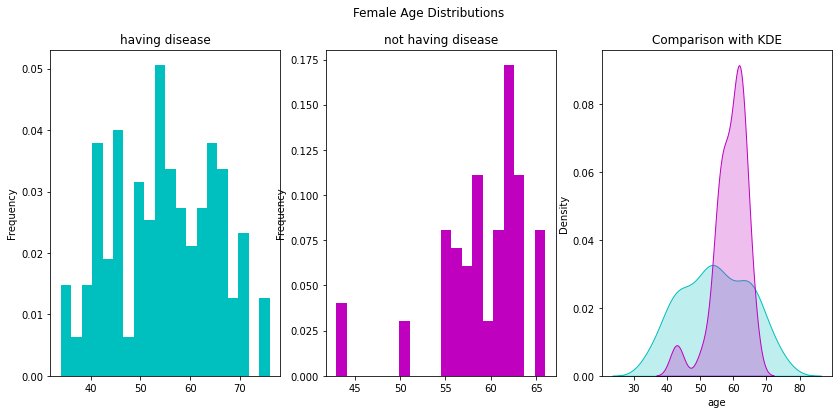

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
have_disease.plot(kind="hist", ax=ax[0], bins=20, label="have_disease", color="c", density=True)
ax[0].set_title("having disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="no_disease", color="m", density=True)
ax[1].set_title("not having disease")

sns.kdeplot(have_disease, shade=True, label="have_disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="no_disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Female Age Distributions")
plt.show()

In [ ]:
ztest(no_disease, have_disease, value=0)

(3.812503561127064, 0.00013756624660034544)

The first value above represents statistic and the second one represents p-value of z test. Since P-value is less than our level of significance (0.05) we are rejecting the null hypothesis (mean of target 1 - mean of target 2 = 0) and we can conclude that age (age) is related to heart disease risk in females. Female people who have heart disease are generally younger than people wh do not have heart disease.

### Statistical Testing of Age for Male People
---

In [ ]:
test_type = "age"

have_disease = df[df["target"] == 1][df["sex"] == 1][test_type]  # female having heart disease
no_disease = df[df["target"] == 0][df["sex"] == 1][test_type]    # female not have heart disease

In [ ]:
print(f"mean of age of male people having disease: {have_disease.mean():.2f}")
print(f"std of age of male people having disease: {have_disease.std():.2f}")

mean of age of male people having disease: 50.74
std of age of male people having disease: 8.74


In [ ]:
print(f"mean of age of male people not having disease: {no_disease.mean():.2f}")
print(f"std of age of male people not having disease: {no_disease.std():.2f}")

mean of age of male people not having disease: 56.05
std of age of male people not having disease: 8.30


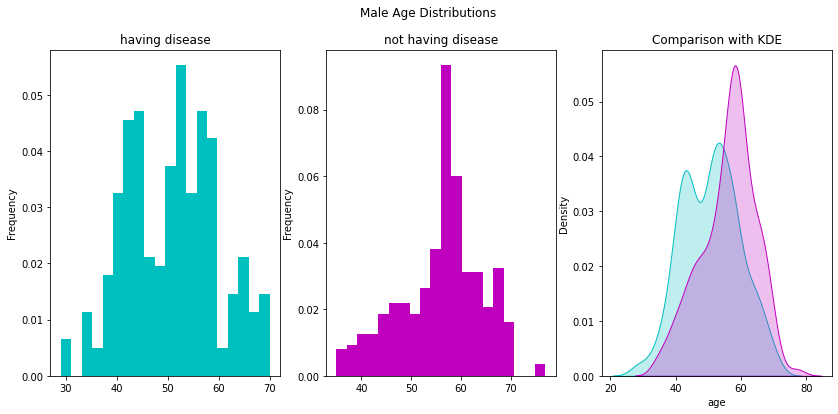

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
have_disease.plot(kind="hist", ax=ax[0], bins=20, label="have_disease", color="c", density=True)
ax[0].set_title("having disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="no_disease", color="m", density=True)
ax[1].set_title("not having disease")

sns.kdeplot(have_disease, shade=True, label="have_disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="no_disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Male Age Distributions")
plt.show()

In [ ]:
ztest(no_disease, have_disease, value=0)

(8.25663033549089, 1.4984258973843178e-16)

The first value above represents statistic and the second one represents p-value of z test. Since P-value is less than our level of significance (0.05) we are rejecting the null hypothesis (mean of target 1 - mean of target 2 = 0) and we can conclude that age (age) is related to heart disease risk in females. Female people who have heart disease are generally younger than people who do not have heart disease.

## Adding New Features


### Adding Ratio of Resting BPS and Cholesterol
---

In [ ]:
df['trestbps/chol'] = [i[0]/i[1] for i in df[["trestbps","chol"]].values] # tansiyon / kolesterol

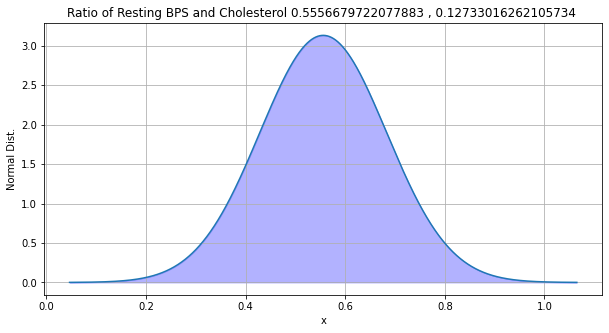

In [ ]:
# mean variance etc
n = df.size

mean = df['trestbps/chol'].mean()

std = df['trestbps/chol'].std()
offset = std*4

x = np.linspace(mean - offset, mean + offset, n)
y = stats.norm.pdf(x,mean, std)
plt.figure(figsize = (10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Dist.")
plt.fill_between(x,y, alpha = 0.3, color = "b")
plt.title(f"Ratio of Resting BPS and Cholesterol {mean} , {std} ")
plt.show()


In [ ]:
test_type = "trestbps/chol"

have_disease = df[df["target"] == 1][test_type]  # having heart disease
no_disease = df[df["target"] == 0][test_type]    # not have heart disease

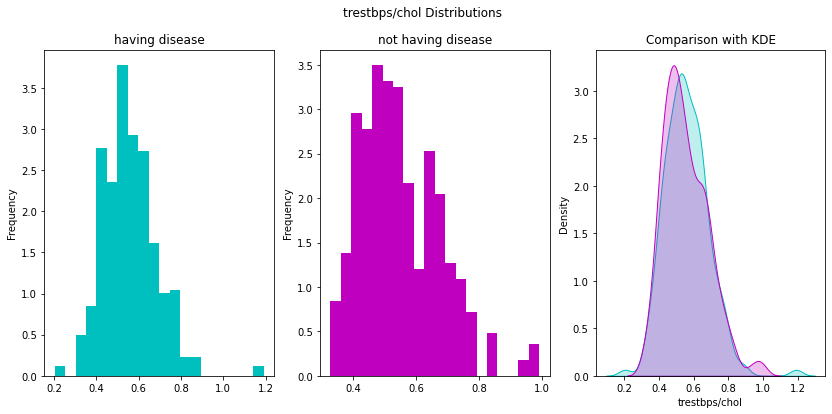

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
have_disease.plot(kind="hist", ax=ax[0], bins=20, label="have_disease", color="c", density=True)
ax[0].set_title("having disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="no_disease", color="m", density=True)
ax[1].set_title("not having disease")

sns.kdeplot(have_disease, shade=True, label="have_disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="no_disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("trestbps/chol Distributions")
plt.show()

In [ ]:
ztest(no_disease, have_disease, value=0)

(-0.5608302422364726, 0.5749132681529237)

The first value above represents statistic and the second one represents p-value of z test. Since P-value is more than our level of significance (0.05) we are accepting the null hypothesis (mean of target 1 - mean of target 2 = 0) and we can conclude that trestbps/chol ratio is not related to heart disease. 

### Adding Ratio of Heart Rate and Age
---

In [ ]:
df['thalach/age'] = [i[0]/(i[1]) for i in df[["thalach","age"]].values] #kalp hızı / yaş

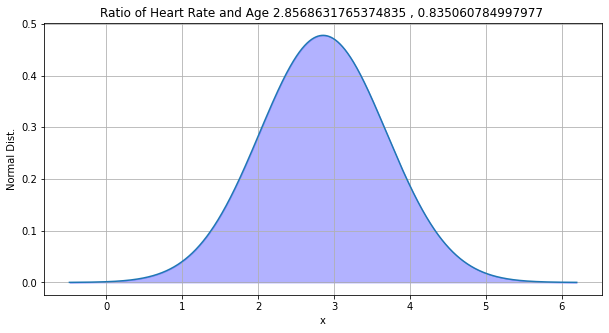

In [ ]:
# mean variance etc
n = df.size

mean = df['thalach/age'].mean()

std = df['thalach/age'].std()
offset = std*4

x = np.linspace(mean - offset, mean + offset, n)
y = stats.norm.pdf(x, mean, std)
plt.figure(figsize = (10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Dist.")
plt.fill_between(x,y, alpha = 0.3, color = "b")
plt.title(f"Ratio of Heart Rate and Age {mean} , {std} ")
plt.show()


In [ ]:
test_type = "thalach/age"

have_disease = df[df["target"] == 1][test_type]  # having heart disease
no_disease = df[df["target"] == 0][test_type]    # not have heart disease

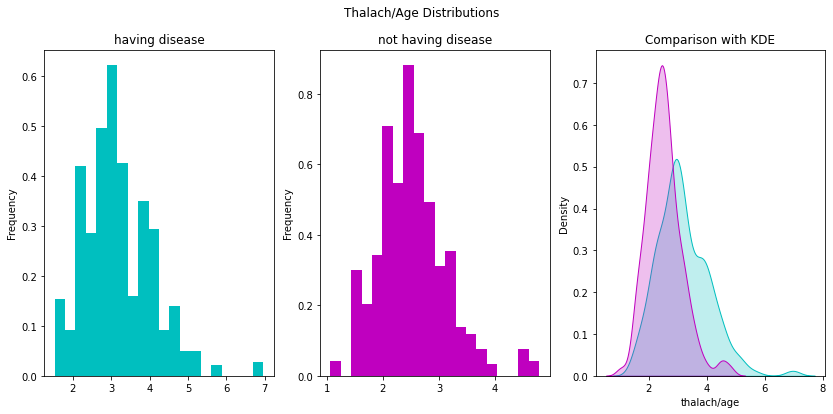

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
have_disease.plot(kind="hist", ax=ax[0], bins=20, label="have_disease", color="c", density=True)
ax[0].set_title("having disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="no_disease", color="m", density=True)
ax[1].set_title("not having disease")

sns.kdeplot(have_disease, shade=True, label="have_disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="no_disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Thalach/Age Distributions")
plt.show()

In [ ]:
ztest(no_disease, have_disease, value=0)

(-13.508893475558098, 1.3858880393739853e-41)

The first value above represents statistic and the second one represents p-value of z test. Since P-value is less than our level of significance (0.05) we are rejecting the null hypothesis (mean of target 1 - mean of target 2 = 0) and we can conclude that thalach/age ratio is related to heart disease. thalach/age ratio can correlate with the heart diesase.

### Adding Ratio of Heart Rate and Cholesterol
---

In [ ]:
df['thalach/chol'] = [i[0]/(i[1]) for i in df[["thalach","chol"]].values] #kalp hızı / kolesterol

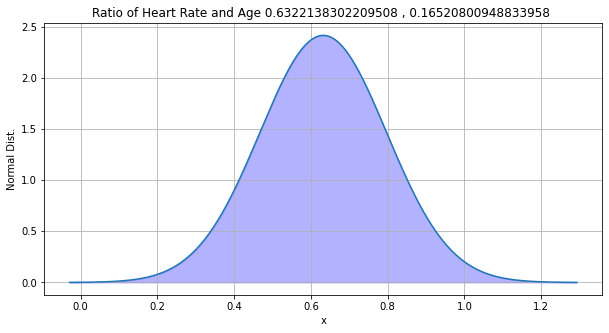

In [ ]:
# mean variance etc
n = df.size

mean = df['thalach/chol'].mean()

std = df['thalach/chol'].std()
offset = std*4

x = np.linspace(mean - offset, mean + offset, n)
y = stats.norm.pdf(x, mean, std)
plt.figure(figsize = (10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Dist.")
plt.fill_between(x,y, alpha = 0.3, color = "b")
plt.title(f"Ratio of Heart Rate and Age {mean} , {std} ")
plt.show()


In [ ]:
test_type = "thalach/chol"

have_disease = df[df["target"] == 1][test_type]  # having heart disease
no_disease = df[df["target"] == 0][test_type]    # not have heart disease

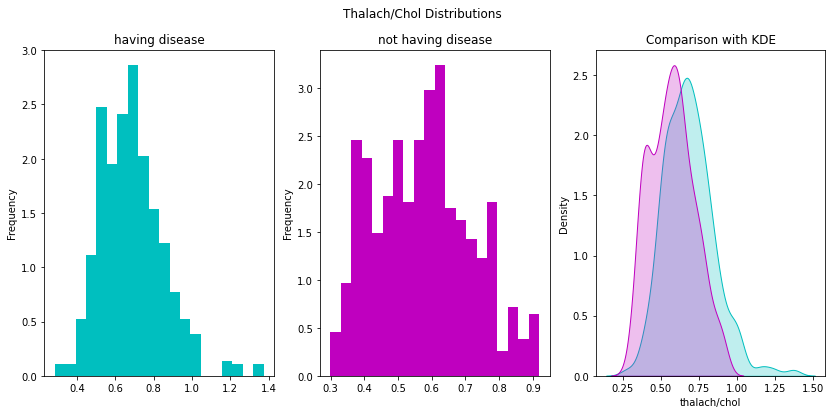

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
have_disease.plot(kind="hist", ax=ax[0], bins=20, label="have_disease", color="c", density=True)
ax[0].set_title("having disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="no_disease", color="m", density=True)
ax[1].set_title("not having disease")

sns.kdeplot(have_disease, shade=True, label="have_disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="no_disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Thalach/Chol Distributions")
plt.show()

In [ ]:
ztest(no_disease, have_disease, value=0)

(-11.422834914861323, 3.2157027139522835e-30)

The first value above represents statistic and the second one represents p-value of z test. Since P-value is less than our level of significance (0.05) we are rejecting the null hypothesis (mean of target 1 - mean of target 2 = 0) and we can conclude that thalach/chol ratio is related to heart disease. thalach/chol ratio can correlate with the heart diesase.

### Adding Ratio of Resting BPS and Age
---

In [ ]:
df['trestbps/age'] = [i[0]/(i[1]) for i in df[["trestbps","age"]].values] #tansiyon / yaş

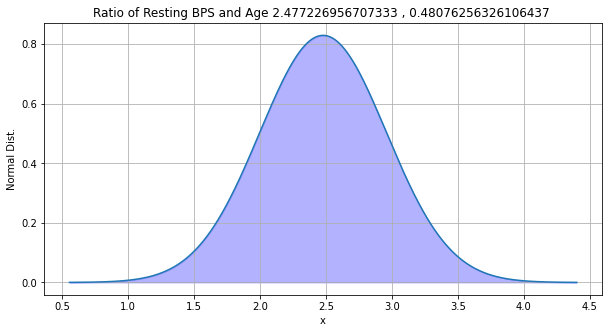

In [ ]:
# mean variance etc
n = df.size

mean = df['trestbps/age'].mean()

std = df['trestbps/age'].std()
offset = std*4

x = np.linspace(mean - offset, mean + offset, n)
y = stats.norm.pdf(x, mean, std)
plt.figure(figsize = (10, 5))
plt.plot(x,y)

plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Dist.")
plt.fill_between(x,y, alpha = 0.3, color = "b")
plt.title(f"Ratio of Resting BPS and Age {mean} , {std} ")
plt.show()


In [ ]:
test_type = "trestbps/age"

have_disease = df[df["target"] == 1][test_type]  # having heart disease
no_disease = df[df["target"] == 0][test_type]    # not have heart disease

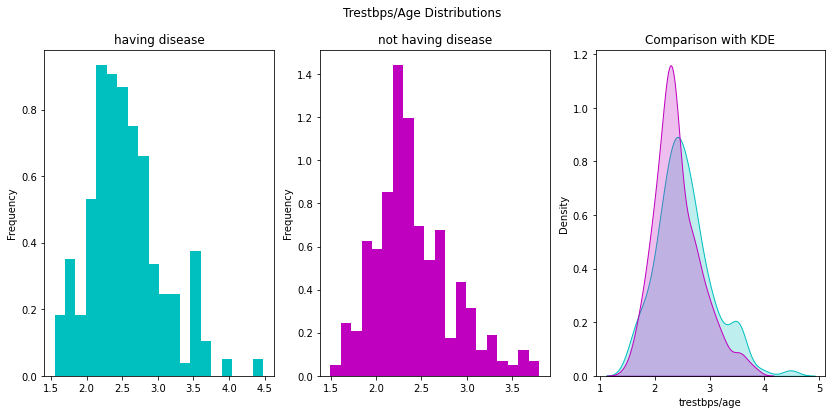

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
have_disease.plot(kind="hist", ax=ax[0], bins=20, label="have_disease", color="c", density=True)
ax[0].set_title("having disease")

no_disease.plot(kind="hist", ax=ax[1], bins=20, label="no_disease", color="m", density=True)
ax[1].set_title("not having disease")

sns.kdeplot(have_disease, shade=True, label="have_disease", ax=ax[2], color="c")
sns.kdeplot(no_disease, shade=True, label="no_disease", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Trestbps/Age Distributions")
plt.show()

In [ ]:
ztest(no_disease, have_disease, value=0)

(-4.357055795725595, 1.3182367218418485e-05)

The first value above represents statistic and the second one represents p-value of z test. Since P-value is less than our level of significance (0.05) we are rejecting the null hypothesis (mean of target 1 - mean of target 2 = 0) and we can conclude that trestbps/age ratio is related to heart disease. thestbps/age ratio can correlate with the heart diesase.

### Showing Last DataFrame Situation
---

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps/chol,thalach/age,thalach/chol,trestbps/age
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.589623,3.230769,0.792453,2.403846
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.689655,2.924528,0.763547,2.641509
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.833333,1.785714,0.718391,2.071429
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.729064,2.639344,0.793103,2.426230
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.469388,1.709677,0.360544,2.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0.633484,2.779661,0.742081,2.372881
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.484496,2.350000,0.546512,2.083333
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,0.400000,2.510638,0.429091,2.340426
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,0.433071,3.180000,0.625984,2.200000


## Machine Learning Process

In this part, we used random forest and kNN machine learning models to test our hypothesis. In order to get the most consistent estimate, we cleaned our data to increase accuracy and thus we got very close estimates. For both models, kNN and random forest, we have achieved accuracy over 0.9.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error

We determined our x and y values ​​to create the model. The x values ​​include the first 4 features, and the y value is the target feature.

In [ ]:
X = df.iloc[:,:4]
y= df.iloc[:,13]

### KNN Algorithm
---

We used this model because it is very efficient for classification. This algorithm is very good at finding similarities and training time is less compared to other algorithms. 

We divided our data into test and training data and trained the model with training data and tested the model with test data.

In [ ]:
X_train, X_remaining, y_train, y_remaining  = train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

In [ ]:
number_of_neighbor = 0 #most efficient number of neighbors.
maxAccuracy = 0 #Set max accuracy as 0


for n in range(1,51): #create model and train it for 50 times to see which one is the best
    
    model_knn = KNeighborsClassifier(n_neighbors = n)
    model_knn.fit(X_train, y_train)

    knn_predictions = model_knn.predict(X_val)
    acc=accuracy_score(y_val, knn_predictions)

    if acc > maxAccuracy: #compare accuracy with the max one
        maxAccuracy = acc
        number_of_neighbor = n
        

In [ ]:
#Testing model accuracy using best_n on test dataset
model_knn = KNeighborsClassifier(n_neighbors = number_of_neighbor)
model_knn.fit(X_train,y_train)
final_preds = model_knn.predict(X_test)
final_acc = accuracy_score(y_test, final_preds)
print(final_acc)

0.9765625


We want mse, mae, rmse values to be low and as we can see their values are low enoguh to have high trust to the model.

In [ ]:
y_pred = model_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 0.0234375
mae: 0.0234375
rmse: 0.15309310892394862


### Random Forest Algorithm
---

Random Forest Algorithm is useful for large and many attributioned-datasets. It has high accuracy in classification problems. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
#Test for random forest method

rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:"+str(rf_acc))

Random Forest Accuracy:0.9727626459143969


We also want mse, mae, rmse values to be low for Random Forest Model and as we can see their values are low enough to have high trust to the model.

In [ ]:
y_pred = model_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 0.027237354085603113
mae: 0.027237354085603113
rmse: 0.1650374323770311


This table shows false positive, false negative, true positive, true negative counts. According to table, true negative and false positive counts are very low. That demonstrates that our model's accuracy is high enough.

Text(0.5, 1.0, 'CONFUSION TABLE')

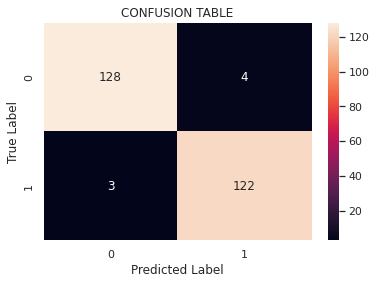

In [ ]:
#Random Forest Labeling
sns.set()
mat = confusion_matrix(y_test, rf_predictions)
sns.heatmap(mat, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("CONFUSION TABLE")

## Conclusion
1) Cholesterol, chest pain type and resting blood pressure are significant indicators of heart disease.

2) Age and sex differences are important factors that must be considered while evaluating heart disease risk.

3) Both KNN and Random Forests algorithms are very efficient for developing heart disease prediciton model but with Random Forest Algorithm, we got higher accuracy level.

## Future Work

For more accurate results, broader datasets and other machine learning models can be implemented.